In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('carmileage.csv')
Y = np.sqrt(df['MPG'])
#X = scipy.stats.boxcox(df['HP'].to_list())[0]
X = df['HP']
df.tail()

,MAKEMODEL,VOL,HP,MPG,SP,WT
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0
81,Rolls-RoyceVarious,107,236,13.2,130,55.0


In [3]:
# Using statsmodels
results = sm.OLS(Y, sm.add_constant(X)).fit(cov_type = "HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     75.03
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.05e-13
Time:                        16:35:29   Log-Likelihood:                -55.774
No. Observations:                  82   AIC:                             115.5
Df Residuals:                      80   BIC:                             120.4
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2125      0.171     42.210      0.0

**P value < 0.05. Hence as per Wald's test, we can reject the null hypothesis that there is no association**

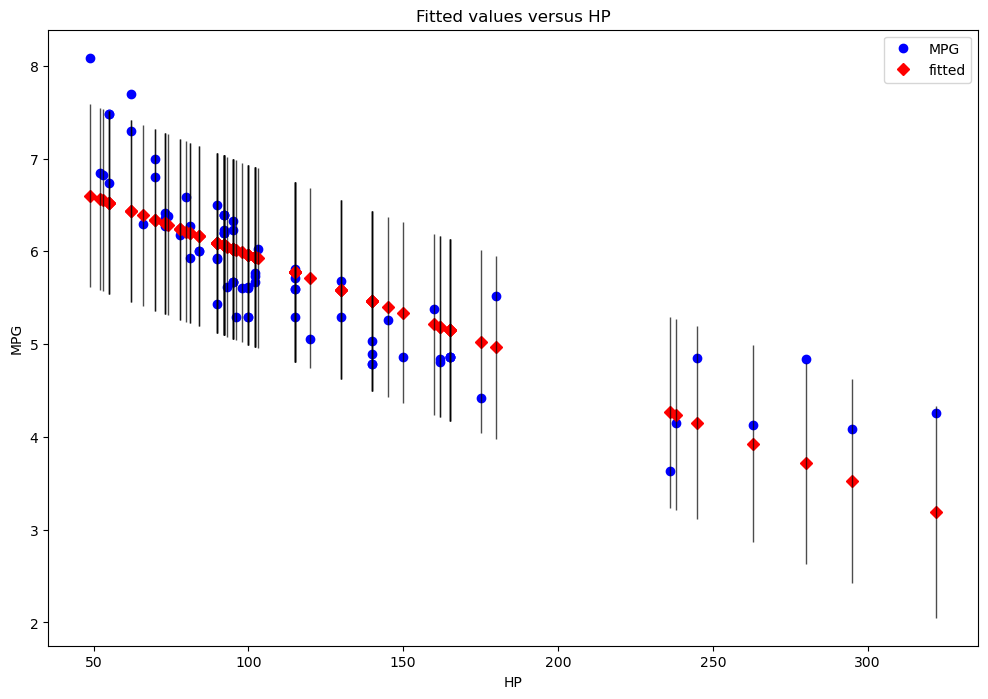

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results, 1, ax=ax)
plt.show()

C:\Users\dskcy\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


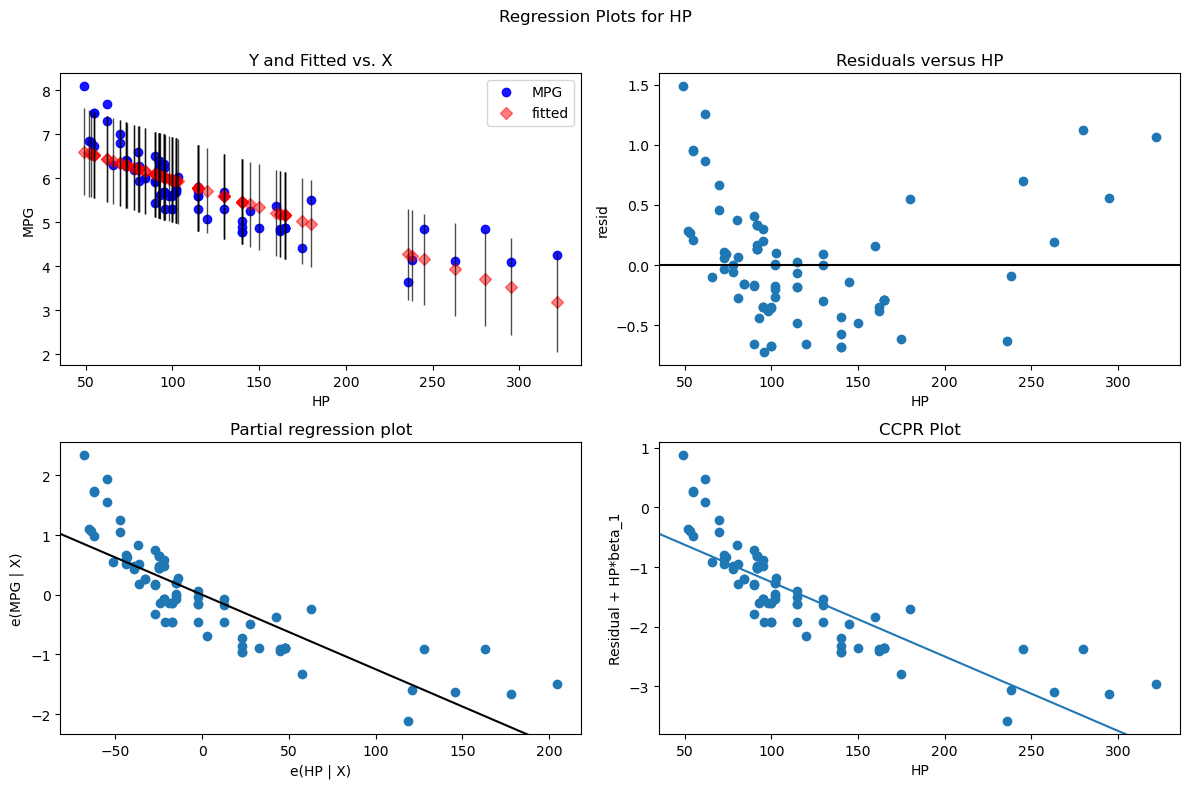

In [95]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'HP', fig=fig)

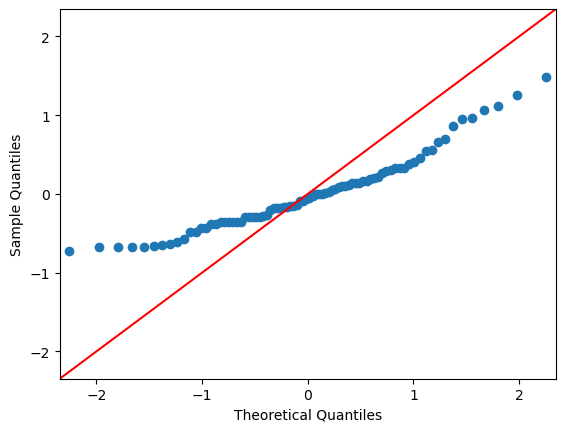

In [96]:
predictions = results.get_prediction(sm.add_constant(X)).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals = Y - predictions['mean']
fig = sm.qqplot(residuals, line='45')

We need to know prediction intervals: `(obs_ci_lower, obs_ci_upper)` - They capture the `se` of both parameter and the residuals.

In [97]:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(np.array(Y).flatten(), np.array(predictions['mean']).flatten())
rmse

0.47770263365428595

# Cross Validation

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [13]:
kfold_validation = KFold(3)

In [16]:
model = LinearRegression()
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
results = cross_val_score(model, sm.add_constant(X), Y, scoring='neg_mean_squared_error', cv=kfold_validation)
results

array([-0.80674061, -0.12056728, -0.95642481])

In [17]:
np.mean(results)

-0.6279108974623239

# Simulation - CLT

In [18]:
np.random.normal(0,sigma)

-0.32922469467550497

In [10]:
x = np.arange(1,21)
a = 0.2 #Intercept
b = 0.3 #Coefficient 
sigma = 0.5 # SD of the residual

y = [ a + b*v + np.random.normal(0,sigma) for v in x]
x2 = [ v*v for v in x]

In [7]:
results = sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     243.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           6.72e-12
Time:                        18:17:44   Log-Likelihood:                -14.588
No. Observations:                  20   AIC:                             33.18
Df Residuals:                      18   BIC:                             35.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1608      0.246     -0.654      0.5

C:\Users\dskcy\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


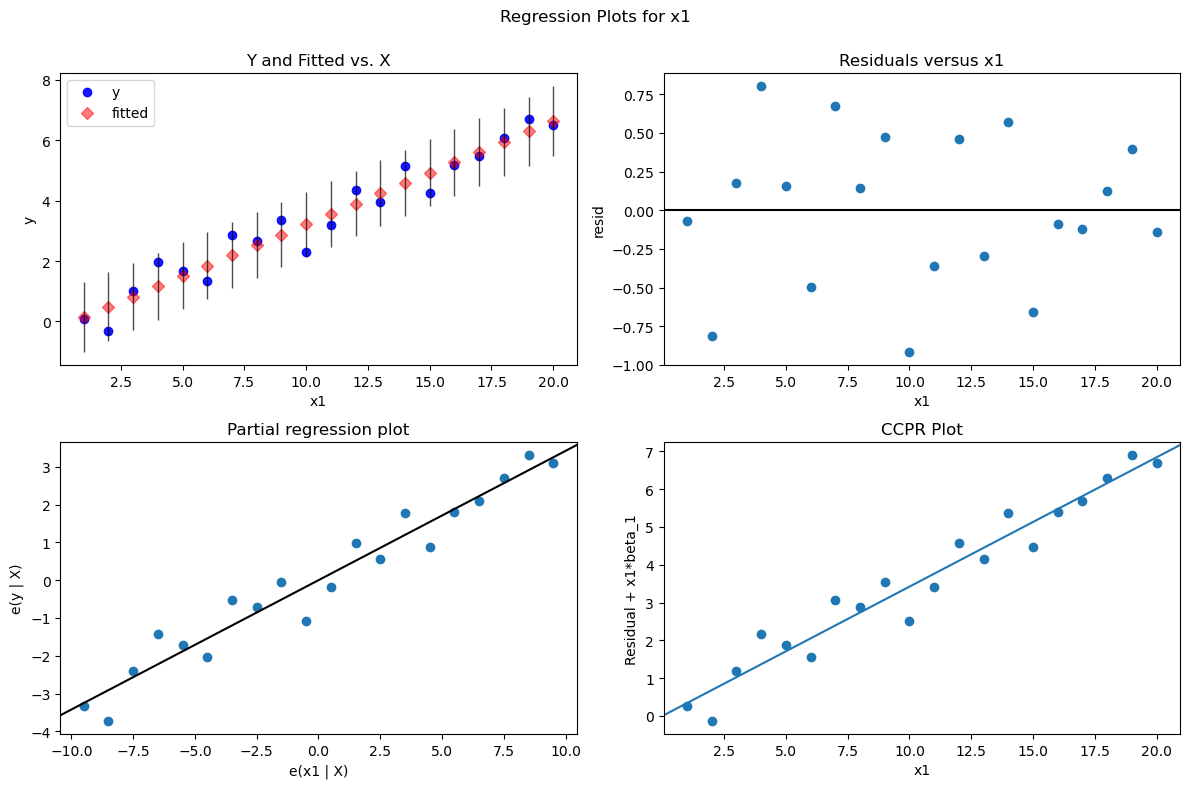

In [5]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'x1', fig=fig)

In [61]:
n_sim = 100
CIs = []
for _ in range(n_sim):
    y = [ a + b*v + np.random.normal(-1,1) for v in x ]
    results = sm.OLS(y, sm.add_constant(x)).fit()
    ci = results.conf_int()[1]
    CIs.append(ci)

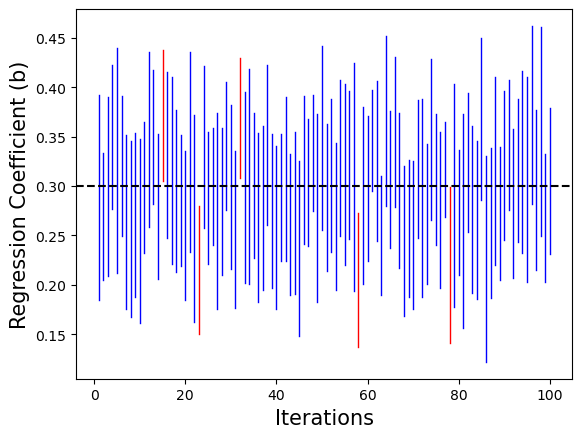

In [62]:
for idx, ci in enumerate(CIs):
    if (ci[1]<0.3) | (ci[0]>0.3):
        c='red'
    else:
        c = 'blue'
    plt.plot([idx+1,idx+1], [ci[0], ci[1]], color=c, lw=1)

plt.axhline(0.3, color='black', linestyle ='--')
plt.xlabel('Iterations',  fontsize=15)
plt.ylabel('Regression Coefficient (b)', fontsize=15)
plt.show()


# India - Pakistan | Hindu - Muslim

In [2]:
india = np.append(np.ones(80), np.zeros(20))
india_happiness = np.random.normal(10,1,100)
india_income = np.random.normal(8230,500,100)


pakistan = np.append(np.ones(20), np.zeros(80))
pakistan_happiness = np.random.normal(5,0.5,100)
pakistan_income = np.random.normal(6260,500,100)

In [3]:
india_df = pd.DataFrame([india,india_happiness, india_income]).T
india_df.columns = ['Religion', 'Happiness', 'Income']
india_df['Country'] = 1

india_df.loc[india_df['Religion'] == 1, 'Happiness'] += 1

india_df

,Religion,Happiness,Income,Country
0,1.0,11.061989,8138.653876,1
1,1.0,10.860886,8336.499026,1
2,1.0,10.427238,7627.421150,1
3,1.0,11.082757,7692.688992,1
4,1.0,10.116774,8701.097495,1
...,...,...,...,...
95,0.0,10.059686,8069.845351,1
96,0.0,10.163664,7554.118115,1
97,0.0,10.242231,8504.369755,1
98,0.0,9.397767,8167.876869,1


In [4]:
pak_df = pd.DataFrame([pakistan,pakistan_happiness, pakistan_income]).T
pak_df.columns = ['Religion', 'Happiness', 'Income']

pak_df['Country'] = 0
# Reduce values in 'column1' where 'column2' is 'C'
pak_df.loc[pak_df['Religion'] == 1, 'Happiness'] -= 1

pak_df

,Religion,Happiness,Income,Country
0,1.0,3.315939,6029.169006,0
1,1.0,3.673108,6638.669539,0
2,1.0,3.946239,4830.022952,0
3,1.0,4.273340,5737.623666,0
4,1.0,4.469770,5642.660548,0
...,...,...,...,...
95,0.0,5.038853,6642.763385,0
96,0.0,5.404847,5263.748159,0
97,0.0,5.637156,5362.841446,0
98,0.0,5.813816,7166.782832,0


In [5]:
df = pd.concat([india_df,pak_df]).reset_index(drop=True)
#df.to_csv('dummy_ind_pak.csv', index=False)

In [6]:
df = pd.read_csv('dummy_ind_pak.csv')
y = df.Happiness
df['IncomeXCountry'] = df['Income']*df['Country']
df['ReligionXCountry'] = df['Religion']*df['Country']

X = df[['Country','Religion','ReligionXCountry']]
results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):          9.81e-121
Time:                        17:28:01   Log-Likelihood:                -226.93
No. Observations:                 200   AIC:                             461.9
Df Residuals:                     196   BIC:                             475.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.8953      0.085  

In [12]:
sub = df[df['Country']==0]
y = sub.Happiness
X = sub[['Religion']]
results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     62.54
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           3.98e-12
Time:                        17:30:22   Log-Likelihood:                -64.001
No. Observations:                 100   AIC:                             132.0
Df Residuals:                      98   BIC:                             137.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8953      0.052     94.455      0.0

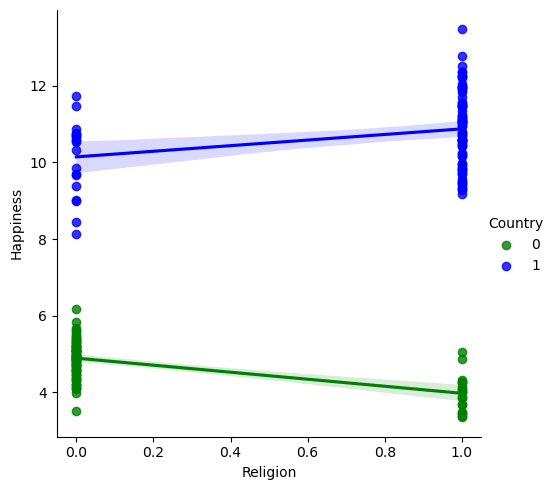

In [7]:
import seaborn as sns

sns.lmplot(x='Religion',y='Happiness',data=df, hue='Country', palette={0:'green',1:'blue'})

plt.show()

In [16]:
df = pd.read_csv("dummy_ind_pak.csv")
df['Income_z'] = (df.Income - df.Income.mean())/df.Income.std()
#df.sample(5)

In [30]:
df.groupby('Religion').Happiness.mean()

Religion
0.0    5.945500
1.0    9.497239
Name: Happiness, dtype: float64

In [17]:
y = df.Happiness
df['ReligionXCountry'] = df['Religion']*df['Country']
df['ReligionXIncomez'] = df['Religion']*df['Income_z']
df['CountryXIncomez'] = df['Country']*df['Income_z']

X = df[['Income_z', 'Country', 'CountryXIncomez']]

results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     899.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.76e-114
Time:                        16:08:30   Log-Likelihood:                -242.09
No. Observations:                 200   AIC:                             492.2
Df Residuals:                     196   BIC:                             505.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.7811      0.209     

In [ ]:
x1 = df.Religion
x2 = df.Country
x3 = x1*x2
y = df.Happiness

X = df[['Religion']]

results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.summary())

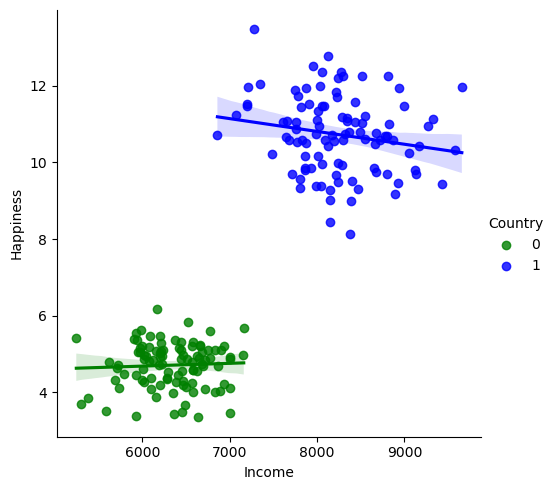

In [8]:
import seaborn as sns

sns.lmplot(x='Income',y='Happiness',data=df, hue='Country', palette={0:'green',1:'blue'})

plt.show()

In [183]:
new_data = np.column_stack(([1], [1]))
pred = results.get_prediction()
#pred_new = results.get_prediction(new_data)
predictions = pred.summary_frame(alpha=0.05)

df['obs_ci_lower'] = predictions['obs_ci_lower']
df['obs_ci_upper'] = predictions['obs_ci_upper']

In [190]:
df[(df.Religion==0)&(df.Country==1)].Happiness.mean()

9.917683450791719

In [192]:
(df[(df.Religion==0)&(df.Country==1)]['obs_ci_upper'].mean() + df[(df.Religion==0)&(df.Country==1)]['obs_ci_lower'].mean())/2

10.788358900277064

In [124]:
df[(df.Religion==1)&((df.Country==0))]['Happiness'].mean()

3.91736262099582

In [41]:
x = np.arange(1,21)
x = np.repeat(x, 10)

a = 0.2 #Intercept
b = 0.3 #Coefficient 
sigma = 0.5 # SD of the residual

y = [ a + b*v + np.random.normal(0,sigma) for v in x]
x2 = [ v+10 for v in x]
X = np.column_stack((x, x2))

results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     2334.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          1.57e-111
Time:                        08:25:25   Log-Likelihood:                -151.28
No. Observations:                 200   AIC:                             306.6
Df Residuals:                     198   BIC:                             313.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0276      0.002    -13.404      0.0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [35]:
y[:10]

[0.11954623512320606,
 0.6963406839367339,
 0.5960156951851279,
 0.580374592832383,
 -0.21965788582086343,
 -0.031870672498360286,
 -0.03473384102355026,
 0.9290935314421125,
 1.0263433606794188,
 -0.06903787988018295]

In [36]:
x[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
gdp_growth_rates = [2.1, 2.5, 2.9, 1.8]  # 2017, 2018, 2019, 2020
gdp_growth_rates = [-0.8, -3.4, 1.8, 0.8]  # 2008-2011 => 2012
#gdp_growth_rates = [2.3, 2.1, 2.5, 1.9]  # 2012-2015 => 2016

weights = []
for j in range(4):
    lambda_ = 0.1**j
    weights.append(lambda_)
sum = np.array(weights).sum()
weights = list(reversed(weights))

# Calculate the weighted average for 2017-2020
weighted_average = 0
for g, w in zip(gdp_growth_rates, weights):
    weighted_average = weighted_average + g*w/sum
weighted_average

0.8507650765076508

In [107]:
weights

[0.0010000000000000002, 0.010000000000000002, 0.1, 1.0]

In [50]:
weights = []
for j in range(15):
    lambda_ = 0.954**j
    weights.append(lambda_)
sum = np.array(weights).sum()

In [56]:
R = [1.6,
     1.7, 1.5, 2.2, 3,
    1.7, 2.7, 3.1, 2.7,
    4, 3.3, 2.5, 2.1,
    1.8, 1.5, 1.8]
R[len(R)-2]

1.5

In [72]:
import math

R = [1.6,
    1.7, 1.5, 2.2, 3,
    1.7, 2.7, 3.1, 2.7,
    4, 3.3, 2.5, 2.1,
    1.8, 1.5, 1.8]

R = [16.5,
    16.3,16.3,16.3,16.5,
    1.8, 2.9,3.3, 2.8,
    2, 1.7, 0.9, 1.5,
    2.6, 2.4, 2.6]

recent_growth = 0
for j in range(15):
    lambda_ = 0.954**j
    if j == 0:
        d_ln_R = np.log(math.pow(R[len(R)-1]/R[len(R)-2],1/3))*400
    else:
        d_ln_R = np.log(R[len(R)-1-j]/R[len(R)-2-j])*400
    
    ans = lambda_ * d_ln_R
    print(ans/sum)
    recent_growth = recent_growth + ans/sum

#recent_growth

0.9691230908214061
-2.7736302859308517
18.183373136982986
16.110025311605053
-19.13468725731849
-4.664705723852635
-9.213357177405507
-4.292029283988747
3.220085242258693
11.338694140142346
65.55651778407541
nan
-5.261572408478489
4.394319562601949
4.637741437651695


C:\Users\dskcy\AppData\Local\Temp\ipykernel_22220\830073564.py:21: RuntimeWarning: invalid value encountered in log
  d_ln_R = np.log(R[len(R)-1-j]/R[len(R)-2-j])*400


In [59]:
np.array(recent_growth).mean()

-0.43838067478172515

In [60]:
recent_growth

[2.207471933160811,
 -6.317784672706236,
 -5.0958967317511945,
 -5.49862291432971,
 -8.352972144322733,
 -5.521561528334082,
 10.76237904960443,
 -3.6088514101996316,
 3.4428442453304484,
 10.998703828083977,
 -12.882445159749022,
 6.7110308128399385,
 7.905856180666509,
 -2.464811751718808,
 1.1389501416994268]

In [61]:
np.log(10)

2.302585092994046